## ***Credit Card Lead Prediction***


## **DATA READING**

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#Importing the dataset to a csv file.
lead = pd.read_csv("train_s3TEQDk.csv")

In [5]:
#Displaying the content of the data
lead.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## **ROUTINE DATA CHECK**

In [6]:
print(lead.columns) ##inspecting the columns
print(lead.shape)   ##inspecting the shape
print(lead.dtypes) ##inspecting the datatypes of variables

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')
(245725, 11)
ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object


In [7]:
##further inspecting the datasets
print(lead.info())     ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(lead.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
None
                 Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141    

## **DATA CLEANING** 

The following steps will be done in data cleaning process :
    
1. Calculating missing value percentage for each column.
3. Dropping the columns with high percentage of missing values.
4. Checking the unique category for each column.
5.  If the columns is highly skewed with one category,such columns will be dropped.
    Combining different categories of the columns with less percentage values into "Others" category.
6. Imputing the column with least missing values percentage.
7. Finally Checking for the number of rows retained after performing all the above steps.

### ***Calculating the missing value percentage in each column***

In [8]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64


From the above snippet result, we can see that there is one column with mising values . Credit_Product column have 11.93%




### ***Data Cleaning - Checking for unique category - Combining categories  having low values to make a meaningful category***

In [9]:
# Checking uniqueness in all categorical variables
lead['Gender'].value_counts(normalize=True)  ##no need to combine

Male      0.546127
Female    0.453873
Name: Gender, dtype: float64

In [10]:
# Checking uniqueness in all categorical variables
lead['Region_Code'].value_counts(normalize=True) ##we can combine many categories 

RG268    0.146237
RG283    0.119711
RG254    0.109228
RG284    0.078624
RG277    0.052197
RG280    0.051989
RG269    0.031999
RG270    0.031417
RG261    0.031063
RG257    0.024829
RG251    0.024214
RG282    0.023722
RG274    0.021512
RG272    0.021373
RG281    0.020726
RG273    0.018301
RG252    0.017442
RG279    0.016181
RG263    0.015005
RG275    0.013206
RG260    0.012656
RG256    0.011586
RG264    0.011366
RG276    0.011248
RG259    0.010524
RG250    0.010158
RG255    0.008212
RG258    0.007940
RG253    0.007561
RG278    0.007415
RG262    0.007276
RG266    0.006422
RG265    0.006292
RG271    0.006275
RG267    0.006092
Name: Region_Code, dtype: float64

In [11]:
# Checking uniqueness in all categorical variables
lead['Occupation'].value_counts(normalize=True) ##we can combine Entrepreneur and self_emp also as self_employed    

Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64

In [12]:
# Checking uniqueness in all categorical variables
lead['Channel_Code'].value_counts(normalize=True) ##no need to do anything

X1    0.422090
X3    0.279630
X2    0.275617
X4    0.022664
Name: Channel_Code, dtype: float64

In [13]:
# Checking uniqueness in all categorical variables
lead['Credit_Product'].value_counts() ##need to impute missing values

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [14]:
# Checking uniqueness in all categorical variables
lead['Is_Active'].value_counts(normalize=True)

No     0.611619
Yes    0.388381
Name: Is_Active, dtype: float64

In [15]:
# Checking uniqueness in all categorical variables
lead['Is_Lead'].value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

Categorical Columns to clean:

- Region_Code - need to combine categories
- Occupation -we can combine Entrepreneur and self_emp also as self_employed.
- Credit_ Product - impute missing values
- Is_Lead - convert to category type 

### ***Imputing columns with low null value percentages***


- Generally categorical columns are imputed with **'mode'**
- Numerical columns are imputed with **mean or median

Imputing Credit_Product with 'No'

In [16]:
lead['Credit_Product'].fillna('No',inplace=True)

In [17]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64


**No missing values**

### ***Data Cleaning - Dropping Highly Skewed Columns***

**Dropping highky skewed columns is important because:** we dont have highly skewed columns to drop

### ***Data Cleaning - Combining columns having low percentages into one single column.***

Columns in which categories are to be combined and form "Others" category 

- Region_Code - need to combine categories
- Occupation -we can combine Entrepreneur and self_emp also 



#### **Region_Code**

In [18]:
#Inspecting the column again
round(lead['Region_Code'].value_counts(normalize=True),2)

RG268    0.15
RG283    0.12
RG254    0.11
RG284    0.08
RG277    0.05
RG280    0.05
RG269    0.03
RG270    0.03
RG261    0.03
RG257    0.02
RG251    0.02
RG282    0.02
RG274    0.02
RG272    0.02
RG281    0.02
RG273    0.02
RG252    0.02
RG279    0.02
RG263    0.02
RG275    0.01
RG260    0.01
RG256    0.01
RG264    0.01
RG276    0.01
RG259    0.01
RG250    0.01
RG255    0.01
RG258    0.01
RG253    0.01
RG278    0.01
RG262    0.01
RG266    0.01
RG265    0.01
RG271    0.01
RG267    0.01
Name: Region_Code, dtype: float64

In [19]:
# Combining categories with very low row percentages (<2%) as it does not make sense to create dummies for such rows.
lead['Region_Code'] = lead['Region_Code'].replace(['RG275' ,
'RG260' ,
'RG256' ,
'RG264' ,
'RG276' ,
'RG259' ,
'RG250' ,
'RG255' ,
'RG258' ,
'RG253' ,
'RG278' ,
'RG262' ,
'RG266' ,
'RG265' ,
'RG271' ,
'RG267']  ,'Others')

In [20]:
# Checking if the category has been correctly replaced. 
round(lead['Region_Code'].value_counts(normalize=True) ,2)

RG268     0.15
Others    0.14
RG283     0.12
RG254     0.11
RG284     0.08
RG277     0.05
RG280     0.05
RG269     0.03
RG270     0.03
RG261     0.03
RG257     0.02
RG251     0.02
RG282     0.02
RG274     0.02
RG272     0.02
RG281     0.02
RG273     0.02
RG252     0.02
RG279     0.02
RG263     0.02
Name: Region_Code, dtype: float64


------------------------------Performing the same for other columns------------------------------------------------


#### **Occupation**

In [21]:
# Inspecting Lead occupation column.
lead['Occupation'].value_counts(normalize=True) 

Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64

In [22]:
# Combining categories
lead['Occupation'] = lead['Occupation'].replace(['Entrepreneur','Self_Emp'] ,'Self_Employed')

In [23]:
# Inspecting Occupation column.
lead['Occupation'].value_counts(normalize=True) 

Self_Employed    0.421418
Salaried         0.293006
Other            0.285575
Name: Occupation, dtype: float64

In [24]:
lead_copy=lead.copy()

In [25]:
lead['Is_Lead'].value_counts() 

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [26]:
lead['Is_Lead']=lead['Is_Lead'].astype('category')

#### **Checking numerical columns**

In [27]:
lead.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [28]:
print(lead.dtypes)

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product           object
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                category
dtype: object


In [29]:
# Write your code for row-wise null count here
print(lead.isnull().sum(axis=1))

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Length: 245725, dtype: int64


In [30]:
# Duplicates check - Checking for any duplicates in the data.
lead.loc[lead.duplicated()]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


**There are no duplicate rows in the dataset.**

## **EDA** 

In [31]:
#Displaying the data types on different columns
lead.dtypes

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product           object
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                category
dtype: object

### **Univariate Analysis on Numerical Values**

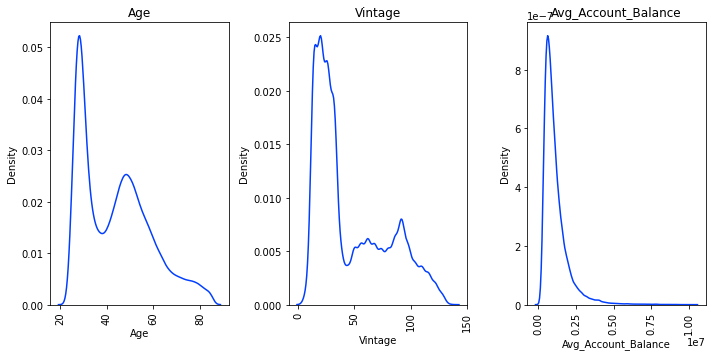

In [32]:
Required_columns= ['Age','Vintage','Avg_Account_Balance']
sns.set_palette("bright")
plt.figure(figsize = (10, 5))

for col in enumerate(Required_columns):
    plt.subplot(1,3, col[0]+1)
    plt.title(col[1])
    sns.distplot(lead[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

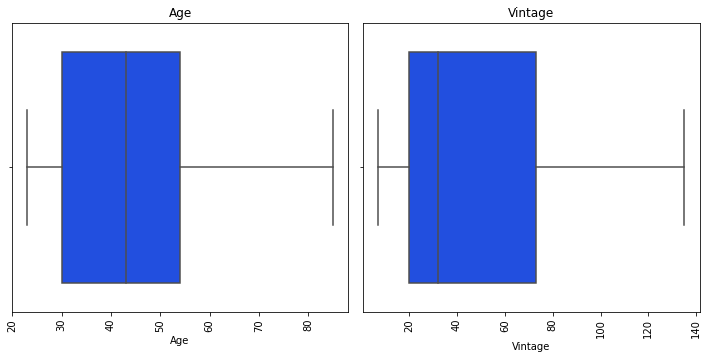

In [33]:
Required_columns= ['Age','Vintage']
sns.set_palette("bright")
plt.figure(figsize = (10, 5))

for col in enumerate(Required_columns):
    plt.subplot(1,2, col[0]+1)
    plt.title(col[1])
    sns.boxplot(lead[col[1]])
    plt.tight_layout()
    plt.xticks(rotation = 90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

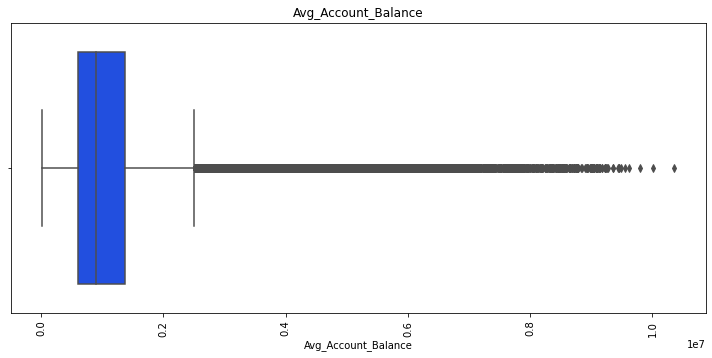

In [34]:
sns.set_palette("bright")
plt.figure(figsize = (10, 5))
plt.title('Avg_Account_Balance')
sns.boxplot(lead['Avg_Account_Balance'])
plt.tight_layout()
plt.xticks(rotation = 90)

**Uni-variate Analysis - Numerical values:**

- The Avg_Account_Balance is skewed.
- Age and vintage doesn't have outliers

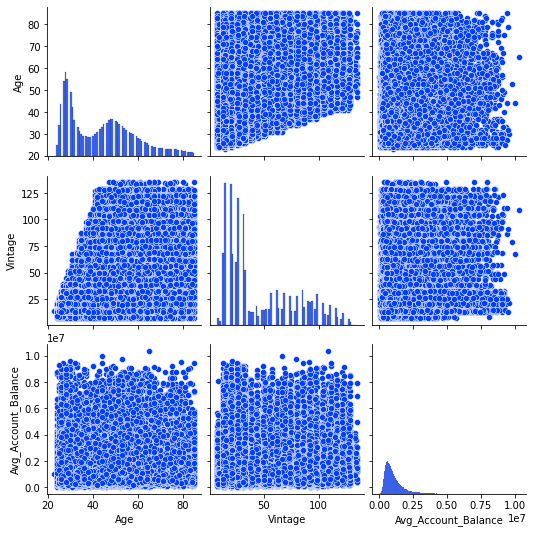

In [35]:
sns.pairplot(lead)
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

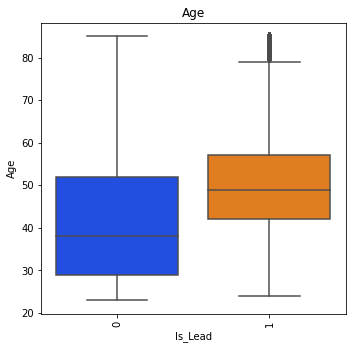

In [36]:
sns.set_palette("bright")
plt.figure(figsize = (5, 5))

plt.title('Age')
ax = sns.boxplot(x='Is_Lead', y='Age', data = lead)
plt.tight_layout()
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

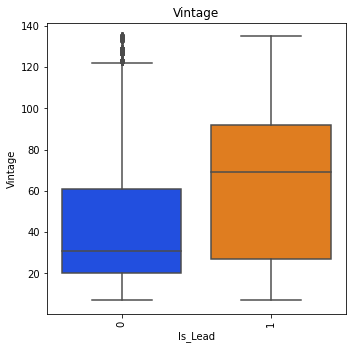

In [37]:
sns.set_palette("bright")
plt.figure(figsize = (5, 5))

plt.title('Vintage')
ax = sns.boxplot(x='Is_Lead', y='Vintage', data = lead)
plt.tight_layout()
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

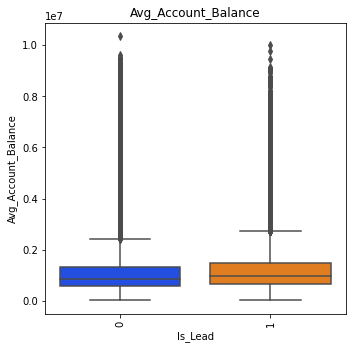

In [38]:
sns.set_palette("bright")
plt.figure(figsize = (5, 5))

plt.title('Avg_Account_Balance')
ax = sns.boxplot(x='Is_Lead', y='Avg_Account_Balance', data = lead)
plt.tight_layout()
plt.xticks(rotation = 90)

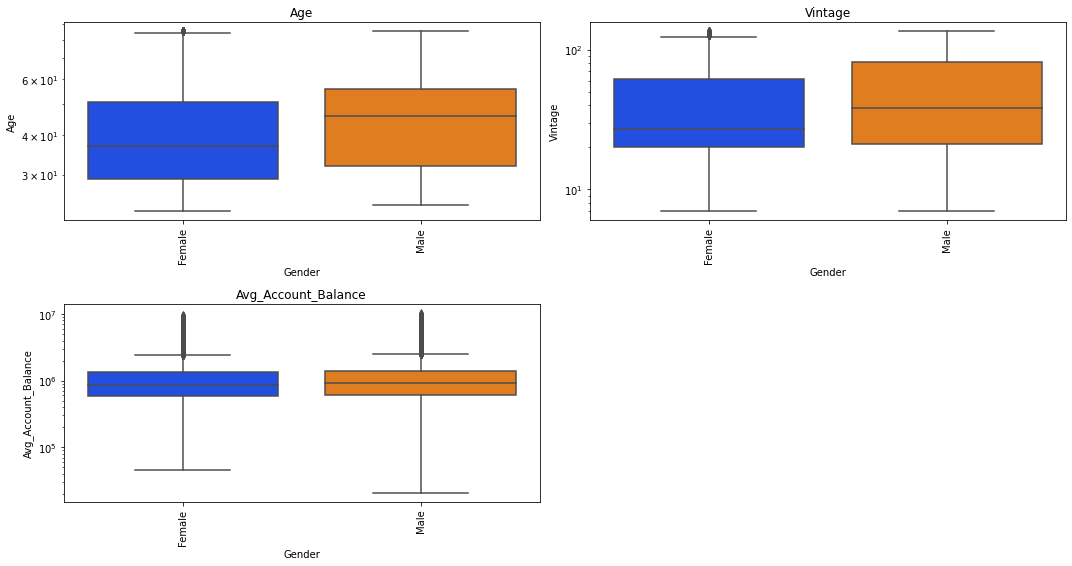

In [39]:
Required_columns= ['Age','Vintage','Avg_Account_Balance']
sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Gender', y=col[1], data = lead)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Bi-variate Analysis - Numerical values:**

- The median of age of potential leads are around 50 years whereas 40 years for non potential leads 
- In vintage, the converted leads are in higher proption in Q1 to median range that is roughly 25 to 70 months vintage period whereas in non leads, the high proption of people are in 30 to 60 months vintage.


### **EDA - Categorical values**

In [40]:
#Copying from the lead dataframe for easier eda
leadCopy = lead.copy()

In [41]:
#Displaying the dataframe
leadCopy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [42]:
leadCopy['Is_Lead'] = leadCopy.Is_Lead.astype('category')

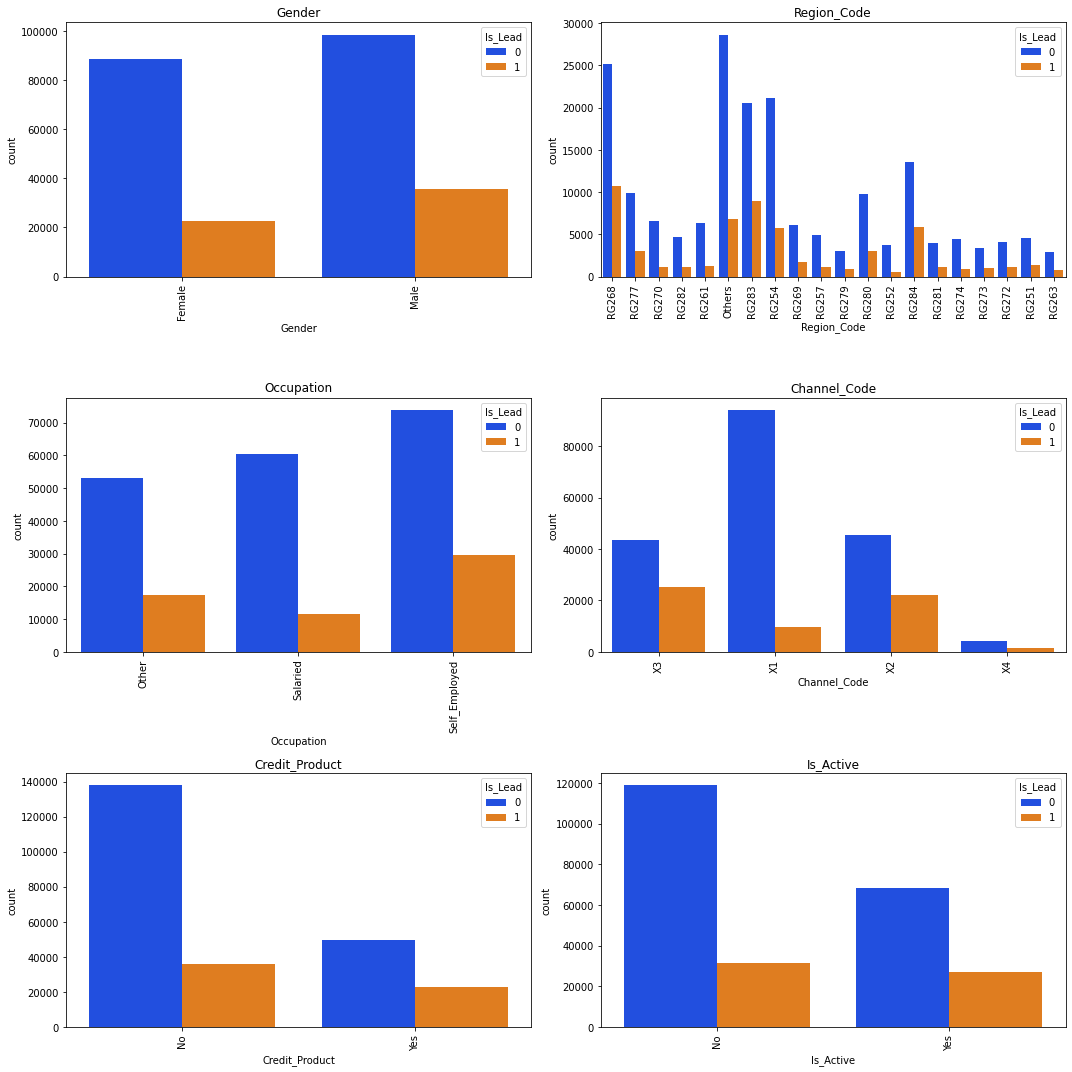

In [43]:
Required_columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = lead, x=col[1], hue='Is_Lead') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

**Bivariate analysis for Categorical data**

- The Male propotion is more in both leads and non leads class
- Salaty people are less likely to turn into leads.So its necessary to focus on this class of grp 
- X3 channel_code have highest leads and proption of leads to non leads to less. Whereas in X1, the proption of leads to non leads are high. So bank need to come with actions keeping the above points into consideration

Quick Summary
- Avg_Account_Balance skewness should be handled

## Multivariate Analysis

<AxesSubplot:>

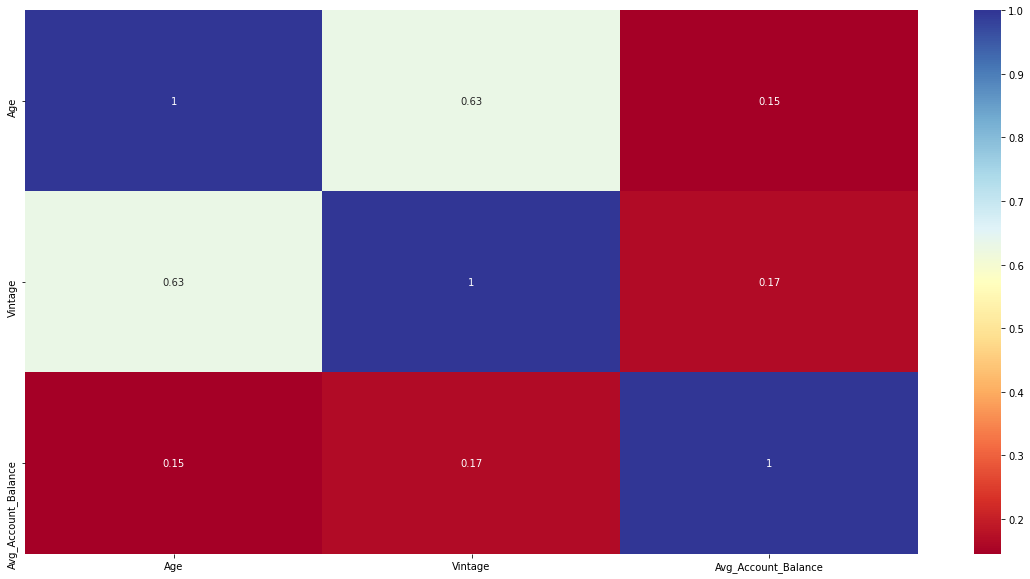

In [44]:
plt.figure(figsize = (20,10))        # Size of the figure

sns.heatmap(lead.corr(),cmap="RdYlBu",annot=True)

**None of the columns are very strongly correlated. So no need to drop any columns**

## **OUTLIER TREATMENT** 

#### Transforming Avg_Account_Balance column to Normally distributed column.

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

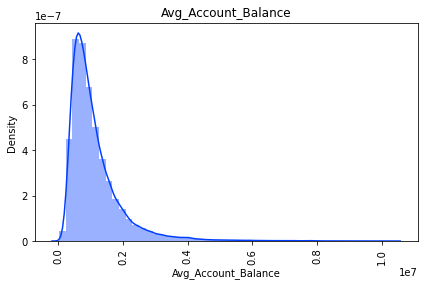

In [45]:
plt.title('Avg_Account_Balance')
sns.distplot(lead['Avg_Account_Balance'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

In [46]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
lead['Avg_Account_Balance'] = pd.DataFrame(pt.fit_transform(lead['Avg_Account_Balance'].values.reshape(-1,1)))


(array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.]),
 [Text(-10.0, 0, '−10'),
  Text(-8.0, 0, '−8'),
  Text(-6.0, 0, '−6'),
  Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6')])

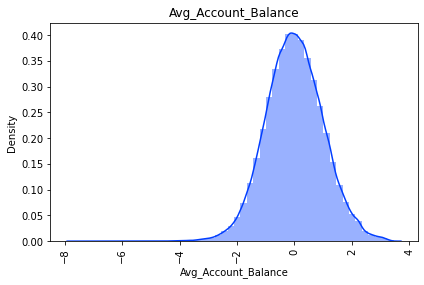

In [47]:
plt.title('Avg_Account_Balance')
sns.distplot(lead['Avg_Account_Balance'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

In [48]:
lead_copy=lead.copy()

In [49]:
#Checking if there are columns that has missing values after imputation. 
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries[nullseries> 0])

Series([], dtype: float64)


## ***DATA PREPARATION BEFORE MODELLING*** 

The following steps will be done as part of data preparation.

1. Converting binary variable (Yes/No) to 1/0
2. Create dummies for categorical columns
3. Perform Scaling

### **Converting Binary Variables**

In [50]:
#Any kind of Data Preparation while performing Model Building involves converting Yes/No columns to binary values.
varlist =['Credit_Product','Is_Active']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [51]:
varlist =['Gender']
def binary_map(x):
  return x.map({'Male' : 1, "Female": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [52]:
#Inspecting the data for the same. 
lead.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,0.239639,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,-0.728404,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,0.787816,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,-1.096365,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,-0.026086,0,0


### **Create Dummies for Categorical columns**

In [53]:
#Checking for categorical columns in the dataframe.
lead.dtypes

ID                       object
Gender                    int64
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product            int64
Avg_Account_Balance     float64
Is_Active                 int64
Is_Lead                category
dtype: object

In [54]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Region_Code','Occupation','Channel_Code']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [55]:
#Checking if the dummy-variables are added into the dataframe correctly.
lead.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,0.239639,0,...,0,0,0,0,0,0,0,0,1,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,-0.728404,0,...,0,0,0,0,0,1,0,0,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,0.787816,1,...,0,0,0,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,-1.096365,0,...,0,0,0,0,0,1,0,0,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,-0.026086,0,...,0,0,1,0,0,1,0,0,0,0


In [56]:
#Dropping the original columns
lead.drop(['Region_Code','Occupation','Channel_Code'],axis=1,inplace=True)

In [57]:
#Inspecting the dataframe again 
lead.head()

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG251,Region_Code_RG252,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,43,0,0.239639,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,IDD62UNG,0,30,32,0,-0.728404,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HD3DSEMC,0,56,26,0,0.787816,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,19,0,-1.096365,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,TEASRWXV,0,30,33,0,-0.026086,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### **Checking the datatypes of all columns**

In [58]:
#Datatypes
lead.dtypes

ID                            object
Gender                         int64
Age                            int64
Vintage                        int64
Credit_Product                 int64
Avg_Account_Balance          float64
Is_Active                      int64
Is_Lead                     category
Region_Code_RG251              uint8
Region_Code_RG252              uint8
Region_Code_RG254              uint8
Region_Code_RG257              uint8
Region_Code_RG261              uint8
Region_Code_RG263              uint8
Region_Code_RG268              uint8
Region_Code_RG269              uint8
Region_Code_RG270              uint8
Region_Code_RG272              uint8
Region_Code_RG273              uint8
Region_Code_RG274              uint8
Region_Code_RG277              uint8
Region_Code_RG279              uint8
Region_Code_RG280              uint8
Region_Code_RG281              uint8
Region_Code_RG282              uint8
Region_Code_RG283              uint8
Region_Code_RG284              uint8
O

**We can see that mostly all columns are already converted into Integer/Numerical datatype, and hence we can continue with our evaluation**

In [59]:
#Adding all feature columns to X Variable
X_train = lead.drop(['ID','Is_Lead'], axis=1)

In [60]:
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,43,0,0.239639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,30,32,0,-0.728404,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,56,26,0,0.787816,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,34,19,0,-1.096365,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,30,33,0,-0.026086,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [61]:
#Adding our target column to Y Variable
y_train = lead['Is_Lead']

In [62]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: category
Categories (2, int64): [0, 1]

### **Scaling all the required variables**

In [63]:
#Checking the dataframe again
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,43,0,0.239639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,30,32,0,-0.728404,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,56,26,0,0.787816,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,34,19,0,-1.096365,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,30,33,0,-0.026086,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [64]:
#We can see that columns except TotalVisits, Time Spent and Page Views Per Visit all the other columns are present in the range of 0 - 1, so we need to scale these variables as well.
scaler = StandardScaler()
X_train[['Age','Vintage','Avg_Account_Balance']] = scaler.fit_transform(X_train[['Age','Vintage','Avg_Account_Balance']])
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,1.965365,-0.122373,0,0.239639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-0.934429,-0.462372,0,-0.728404,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.818935,-0.647825,0,0.787816,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,-0.664680,-0.864188,0,-1.096365,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,-0.934429,-0.431463,0,-0.026086,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [65]:
#Checking the mean and standard deviation
X_train.describe()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
count,245725.000000,2.457250e+05,2.457250e+05,245725.000000,2.457250e+05,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,...,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000
mean,0.546127,-9.501855e-17,1.052549e-16,0.293185,-3.088248e-17,0.388381,0.024214,0.017442,0.109228,0.024829,...,0.051989,0.020726,0.023722,0.119711,0.078624,0.293006,0.421418,0.275617,0.279630,0.022664
std,0.497869,1.000002e+00,1.000002e+00,0.455224,1.000002e+00,0.487383,0.153713,0.130913,0.311925,0.155603,...,0.222005,0.142467,0.152181,0.324624,0.269152,0.455142,0.493787,0.446826,0.448818,0.148829
min,0.000000,-1.406488e+00,-1.235096e+00,0.000000,-7.668408e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.344286e-01,-8.332792e-01,0.000000,-6.642435e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-5.774682e-02,-4.623716e-01,0.000000,-1.181547e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.840608e-01,8.048961e-01,1.000000,6.605656e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,2.774610e+00,2.721252e+00,1.000000,3.456570e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Standard Deviation is set to 1 and hence it is scaled correctly.**

### **Conversion Rate before modelling**

In [66]:
#Checking the Converted Rate
Converted_Rate = (sum(lead['Is_Lead'])/len(lead['Is_Lead'].index))*100
Converted_Rate

23.720826126767726

**We can see that conversion rate before modelling is found to be around 23.72%**

## ***MODEL BUILDING***


### ***Model - I***

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

In [68]:
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Is_Lead   No. Observations:               245725
Model:                            GLM   Df Residuals:                   245694
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1900e+05
Date:                Sun, 30 May 2021   Deviance:                   2.3799e+05
Time:                        18:50:06   Pearson chi2:                 2.47e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
#Total number of columns
print(len(X_train.columns))

30


**We currently have around 30 columns for our evaluation.**

### ***Model - II : Feature Selection using RFE***

In [70]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
#We currently have 30 features with respect to our discussion, and since 30 is a huge number we will reduce it to 15 columns using RFE.
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
#Printing all the columns that are selected using RFE
rfe.support_

array([False,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True])

In [73]:
#List of all columns on priority ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 8),
 ('Age', True, 1),
 ('Vintage', True, 1),
 ('Credit_Product', True, 1),
 ('Avg_Account_Balance', False, 12),
 ('Is_Active', False, 11),
 ('Region_Code_RG251', False, 7),
 ('Region_Code_RG252', False, 9),
 ('Region_Code_RG254', True, 1),
 ('Region_Code_RG257', False, 6),
 ('Region_Code_RG261', False, 14),
 ('Region_Code_RG263', False, 2),
 ('Region_Code_RG268', True, 1),
 ('Region_Code_RG269', False, 3),
 ('Region_Code_RG270', False, 16),
 ('Region_Code_RG272', False, 13),
 ('Region_Code_RG273', True, 1),
 ('Region_Code_RG274', False, 10),
 ('Region_Code_RG277', True, 1),
 ('Region_Code_RG279', True, 1),
 ('Region_Code_RG280', False, 5),
 ('Region_Code_RG281', False, 4),
 ('Region_Code_RG282', False, 15),
 ('Region_Code_RG283', True, 1),
 ('Region_Code_RG284', True, 1),
 ('Occupation_Salaried', True, 1),
 ('Occupation_Self_Employed', True, 1),
 ('Channel_Code_X2', True, 1),
 ('Channel_Code_X3', True, 1),
 ('Channel_Code_X4', True, 1)]

In [74]:
#This list will hold all the data that is being selected through RFE.
col = X_train.columns[rfe.support_]

In [75]:
col

Index(['Age', 'Vintage', 'Credit_Product', 'Region_Code_RG254',
       'Region_Code_RG268', 'Region_Code_RG273', 'Region_Code_RG277',
       'Region_Code_RG279', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X2',
       'Channel_Code_X3', 'Channel_Code_X4'],
      dtype='object')

In [76]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

Index(['Gender', 'Avg_Account_Balance', 'Is_Active', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG257', 'Region_Code_RG261',
       'Region_Code_RG263', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG272', 'Region_Code_RG274', 'Region_Code_RG280',
       'Region_Code_RG281', 'Region_Code_RG282'],
      dtype='object')

#### **Assessing the model that has already been generated through RFE using Statsmodel - Model 2**

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Is_Lead   No. Observations:               245725
Model:                            GLM   Df Residuals:                   245709
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1906e+05
Date:                Sun, 30 May 2021   Deviance:                   2.3813e+05
Time:                        18:50:31   Pearson chi2:                 2.47e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Channel_Code_X3,2.89
0,Age,2.68
11,Occupation_Self_Employed,2.64
12,Channel_Code_X2,2.43
1,Vintage,2.00
10,Occupation_Salaried,1.94
2,Credit_Product,1.44
4,Region_Code_RG268,1.31
8,Region_Code_RG283,1.26
3,Region_Code_RG254,1.19


 - Factors that are needed for consideration : VIF < 5% and P-Value < 5%

### ***Prediction of Y - values, as per the final model.***

In [80]:
# Getting the predicted values on the train set
# X_train_sm will provide the predictor variable. 
# res will contain the Logistic Regression model result
# y_train_Pred will provide us the Predicted Y Values for the given feature variables.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.273858
1    0.128302
2    0.234946
3    0.103062
4    0.114569
5    0.064189
6    0.191844
7    0.181280
8    0.255751
9    0.383378
dtype: float64

In [81]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

#### **Creation of DataFrame - with the predicted Y values.**

In [82]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Is_Lead':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Is_Lead,Conversion_Prob,Cust_Id
0,0,0.273858,0
1,0,0.128302,1
2,0,0.234946,2
3,0,0.103062,3
4,0,0.114569,4


In [83]:
#Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Is_Lead,Conversion_Prob,Cust_Id,predicted
0,0,0.273858,0,0
1,0,0.128302,1,0
2,0,0.234946,2,0
3,0,0.103062,3,0
4,0,0.114569,4,0


#### **Calculation of Metrics for the final model**

In [84]:
#Importing the required libraries for metric calculation
from sklearn import metrics

In [85]:
# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.predicted )
print(confusion)

[[183786   3651]
 [ 52324   5964]]


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.predicted))

0.7722047003764371


In [87]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.10231951688169091

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.9805214552089502

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.019478544791049792


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7783914277243658


#### **ROC Curve and its parameters**

In [92]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Is_Lead, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

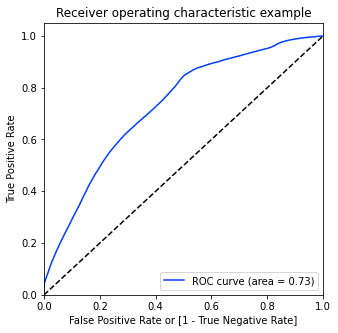

In [94]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Conversion_Prob)

**The ROC curve is plotted to find the trade off between Sensitivity and Specificity.**

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Is_Lead,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.273858,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.128302,1,0,1,1,0,0,0,0,0,0,0,0
2,0,0.234946,2,0,1,1,1,0,0,0,0,0,0,0
3,0,0.103062,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.114569,4,0,1,1,0,0,0,0,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.237208  1.000000  0.000000
0.1   0.1  0.428320  0.931272  0.271915
0.2   0.2  0.597237  0.800233  0.534110
0.3   0.3  0.691383  0.612081  0.716043
0.4   0.4  0.752231  0.319071  0.886933
0.5   0.5  0.772205  0.102320  0.980521
0.6   0.6  0.770565  0.033334  0.999824
0.7   0.7  0.764424  0.006948  0.999979
0.8   0.8  0.762792  0.000000  1.000000
0.9   0.9  0.762792  0.000000  1.000000


#### **Intersection between Accuracy - Sensitivity and Specificity**

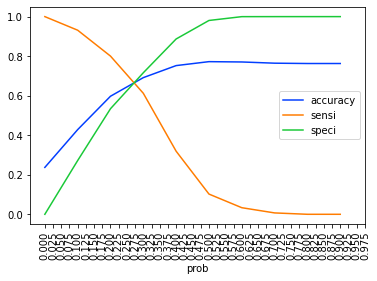

<Figure size 720x720 with 0 Axes>

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.025), rotation = 90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

**From the curve above, 0.275 is the optimum point to take it as a cutoff probability.**

#### **Calculation of predicted values on the score - 0.275**

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.275 else 0)
y_train_pred_final.head()

,Is_Lead,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.273858,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.128302,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.234946,2,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.103062,3,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.114569,4,0,1,1,0,0,0,0,0,0,0,0,0


#### **Metrics calculation for after choosing final probability cut off.**

In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.final_predicted)

0.6651744836707701

In [100]:
#Confusion matrix after probability cutoff - 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.final_predicted )
confusion2

array([[124705,  62732],
       [ 19543,  38745]], dtype=int64)

In [101]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6647165797419708

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.6653168798049478

In [104]:
# Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
print(FP/ float(TN+FP))

0.3346831201950522


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.38181065660198865


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8645180522433586


#### ***ACCURACY - SPECIFICITY - SENSITIVITY***

- **ACCURACY - 66.40%**
- **SENSITIVITY - 66.75%**
- **SPECIFICITY - 66.29%**

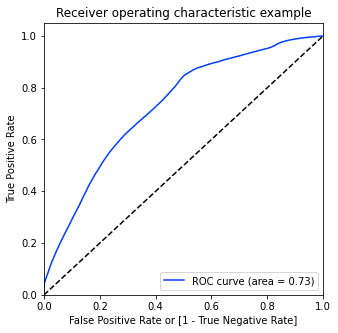

In [107]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Conversion_Prob)

## ***MODEL EVALUATION : ON TEST SET***

In [108]:
#Importing the dataset to a csv file.
test_df = pd.read_csv("test_mSzZ8RL.csv")

In [109]:
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## **ROUTINE DATA CHECK**

In [110]:
print(test_df.columns) ##inspecting the columns
print(test_df.shape)   ##inspecting the shape
print(test_df.dtypes) ##inspecting the datatypes of variables

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')
(105312, 10)
ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object


In [111]:
##further inspecting the datasets
print(test_df.info())     ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(test_df.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB
None
                 Age        Vintage  Avg_Account_Balance
count  105312.000000  105312.000000         1.053120e+05
mean       43.871002      46.842819         1.134195e+06
std        14.872890      32.273634         8.662430e+05
min   

## **DATA CLEANING** 

Performing same data cleaning steps on test data also.

In [112]:
#Percentage of missing values in each column.
nullseries = round(test_df.isnull().sum() * 100 / len(test_df),2)
print(nullseries)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.89
Avg_Account_Balance     0.00
Is_Active               0.00
dtype: float64


From the above snippet result, we can see that there is one column with mising values . Credit_Product column have 11.89%

### *Data Cleaning - Checking for unique category - Combining categories having low values to make a meaningful category*

In [113]:
# Checking uniqueness in all categorical variables
test_df['Gender'].value_counts(normalize=True)  ##no need to combine

Male      0.547943
Female    0.452057
Name: Gender, dtype: float64

In [114]:
# Checking uniqueness in all categorical variables
round(test_df['Region_Code'].value_counts(normalize=True),2) ##we can combine many categories 

RG268    0.14
RG283    0.12
RG254    0.11
RG284    0.08
RG277    0.05
RG280    0.05
RG270    0.03
RG269    0.03
RG261    0.03
RG251    0.03
RG257    0.02
RG272    0.02
RG282    0.02
RG274    0.02
RG281    0.02
RG252    0.02
RG273    0.02
RG263    0.02
RG279    0.02
RG275    0.01
RG260    0.01
RG264    0.01
RG256    0.01
RG276    0.01
RG259    0.01
RG250    0.01
RG255    0.01
RG278    0.01
RG258    0.01
RG253    0.01
RG262    0.01
RG265    0.01
RG271    0.01
RG266    0.01
RG267    0.01
Name: Region_Code, dtype: float64

In [115]:
# Checking uniqueness in all categorical variables
test_df['Occupation'].value_counts(normalize=True) ##we can combine Entrepreneur and self_emp also as self_employed    

Self_Employed    0.410134
Salaried         0.293537
Other            0.286112
Entrepreneur     0.010217
Name: Occupation, dtype: float64

In [116]:
# Checking uniqueness in all categorical variables
test_df['Channel_Code'].value_counts(normalize=True) ##no need to do anything

X1    0.422402
X3    0.277927
X2    0.277043
X4    0.022628
Name: Channel_Code, dtype: float64

In [117]:
# Checking uniqueness in all categorical variables
test_df['Credit_Product'].value_counts() ##need to impute missing values

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [118]:
# Checking uniqueness in all categorical variables
test_df['Is_Active'].value_counts(normalize=True)

No     0.60579
Yes    0.39421
Name: Is_Active, dtype: float64

Categorical Columns to clean:

- Region_Code - need to combine categories
- Occupation -we can combine Entrepreneur and self_emp also as self_employed.
- Credit_ Product - impute missing values


## *Imputing columns with low null value percentages*

- Generally categorical columns are imputed with 'mode'
- Numerical columns are imputed with **mean or median

**Imputing Credit_Product with 'No'**



In [119]:
test_df['Credit_Product'].fillna('No',inplace=True)

In [120]:
#Percentage of missing values in each column.
nullseries = round(test_df.isnull().sum() * 100 / len(test_df),2)
print(nullseries)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64


**No missing values**

### ***Data Cleaning - Dropping Highly Skewed Columns***

**Dropping highky skewed columns is important because:** we dont have highly skewed columns to drop

### ***Data Cleaning - Combining columns having low percentages into one single column.***

Columns in which categories are to be combined and form "Others" category

- Region_Code - need to combine categories
- Occupation -we can combine Entrepreneur and self_emp also

#### **Region_Code**

In [121]:
#Inspecting the column again
round(test_df['Region_Code'].value_counts(normalize=True),2)

RG268    0.14
RG283    0.12
RG254    0.11
RG284    0.08
RG277    0.05
RG280    0.05
RG270    0.03
RG269    0.03
RG261    0.03
RG251    0.03
RG257    0.02
RG272    0.02
RG282    0.02
RG274    0.02
RG281    0.02
RG252    0.02
RG273    0.02
RG263    0.02
RG279    0.02
RG275    0.01
RG260    0.01
RG264    0.01
RG256    0.01
RG276    0.01
RG259    0.01
RG250    0.01
RG255    0.01
RG278    0.01
RG258    0.01
RG253    0.01
RG262    0.01
RG265    0.01
RG271    0.01
RG266    0.01
RG267    0.01
Name: Region_Code, dtype: float64

In [122]:
# Combining categories with very low row percentages (<2%) as it does not make sense to create dummies for such rows.
test_df['Region_Code'] = test_df['Region_Code'].replace(['RG275' ,
'RG260' ,
'RG256' ,
'RG264' ,
'RG276' ,
'RG259' ,
'RG250' ,
'RG255' ,
'RG258' ,
'RG253' ,
'RG278' ,
'RG262' ,
'RG266' ,
'RG265' ,
'RG271' ,
'RG267']  ,'Others')

In [123]:
# Checking if the category has been correctly replaced. 
round(test_df['Region_Code'].value_counts(normalize=True) ,2)

Others    0.14
RG268     0.14
RG283     0.12
RG254     0.11
RG284     0.08
RG277     0.05
RG280     0.05
RG270     0.03
RG269     0.03
RG261     0.03
RG251     0.03
RG257     0.02
RG272     0.02
RG282     0.02
RG274     0.02
RG281     0.02
RG252     0.02
RG273     0.02
RG263     0.02
RG279     0.02
Name: Region_Code, dtype: float64


------------------------------Performing the same for other columns------------------------------------------------


#### **Occupation**

In [124]:
# Inspecting occupation column.
test_df['Occupation'].value_counts(normalize=True) 

Self_Employed    0.410134
Salaried         0.293537
Other            0.286112
Entrepreneur     0.010217
Name: Occupation, dtype: float64

In [125]:
# Combining categories
test_df['Occupation'] = test_df['Occupation'].replace(['Entrepreneur','Self_Emp'] ,'Self_Employed')

In [126]:
# Inspecting Occupation column.
test_df['Occupation'].value_counts(normalize=True) 

Self_Employed    0.420351
Salaried         0.293537
Other            0.286112
Name: Occupation, dtype: float64

In [127]:
test_copy=test_df.copy()

#### **Checking numerical columns**

In [128]:
test_df.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [129]:
print(test_df.dtypes)

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object


In [130]:
# Write your code for row-wise null count here
print(test_df.isnull().sum(axis=1))

0         0
1         0
2         0
3         0
4         0
         ..
105307    0
105308    0
105309    0
105310    0
105311    0
Length: 105312, dtype: int64


In [131]:
# Duplicates check - Checking for any duplicates in the data.
test_df.loc[test_df.duplicated()]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active


## **EDA**

### **Univariate Analysis on Numerical Values**

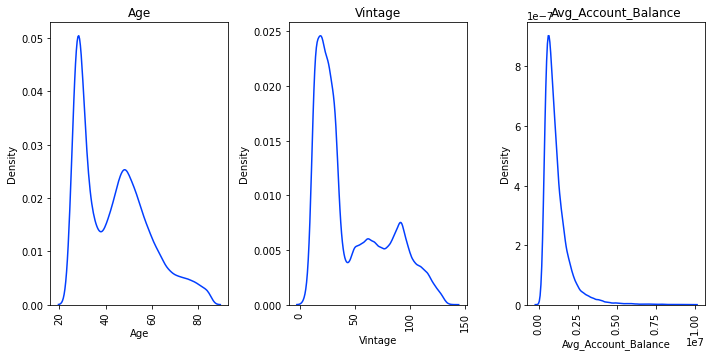

In [132]:
Required_columns= ['Age','Vintage','Avg_Account_Balance']
sns.set_palette("bright")
plt.figure(figsize = (10, 5))

for col in enumerate(Required_columns):
    plt.subplot(1,3, col[0]+1)
    plt.title(col[1])
    sns.distplot(test_df[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

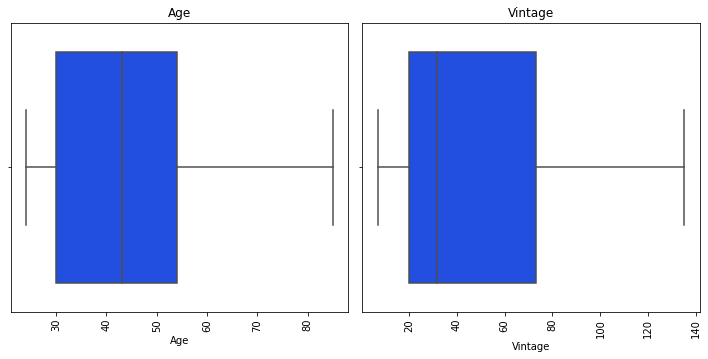

In [133]:
Required_columns= ['Age','Vintage']
sns.set_palette("bright")
plt.figure(figsize = (10, 5))

for col in enumerate(Required_columns):
    plt.subplot(1,2, col[0]+1)
    plt.title(col[1])
    sns.boxplot(test_df[col[1]])
    plt.tight_layout()
    plt.xticks(rotation = 90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

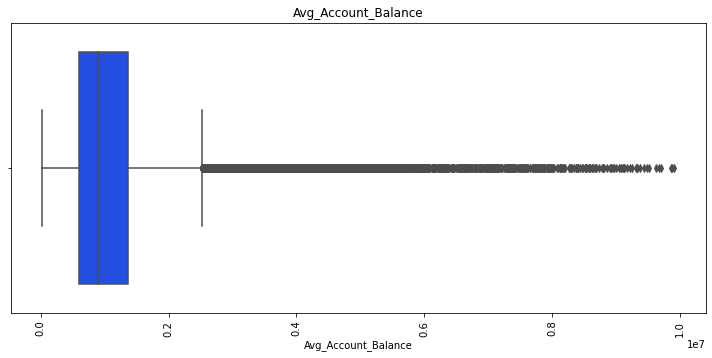

In [134]:
sns.set_palette("bright")
plt.figure(figsize = (10, 5))
plt.title('Avg_Account_Balance')
sns.boxplot(test_df['Avg_Account_Balance'])
plt.tight_layout()
plt.xticks(rotation = 90)

**Uni-variate Analysis - Numerical values:**

- The Avg_Account_Balance is skewed.
- Age and vintage doesn't have outliers

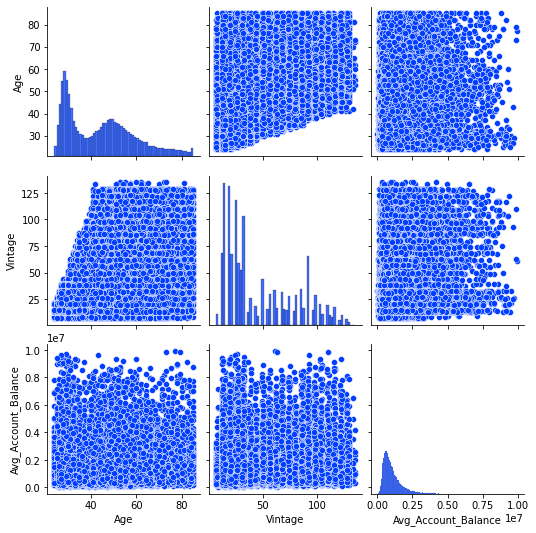

In [135]:
sns.pairplot(test_df)
plt.show()

Quick Summary

Avg_Account_Balance skewness should be handled

## Multivariate Analysis

<AxesSubplot:>

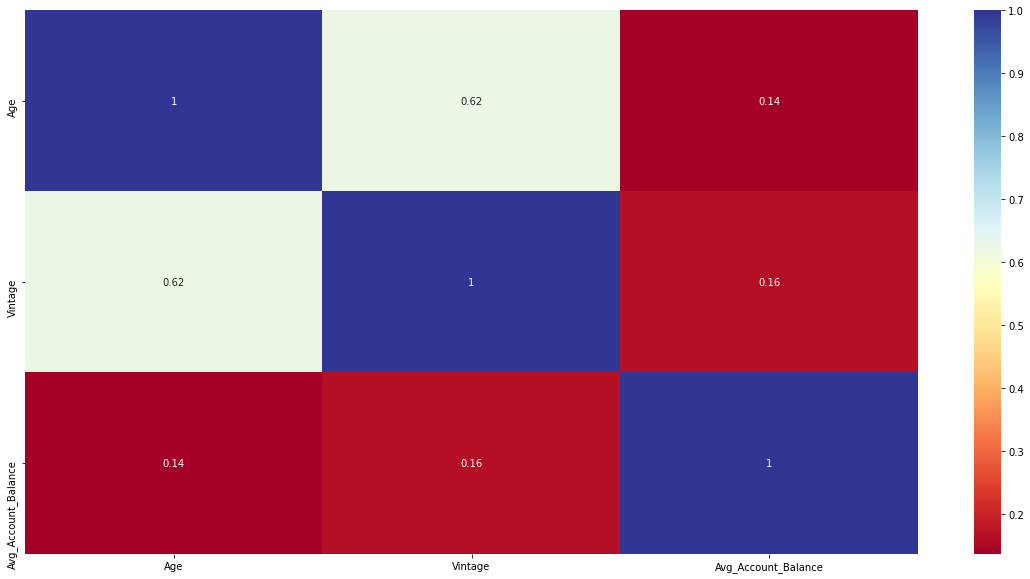

In [136]:
plt.figure(figsize = (20,10))        # Size of the figure

sns.heatmap(test_df.corr(),cmap="RdYlBu",annot=True)

## OUTLIER TREATMENT

**Transforming Avg_Account_Balance column to Normally distributed column.**

In [137]:
test_copy=test_df.copy()

In [138]:
test_copy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

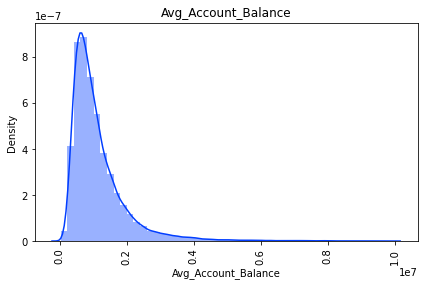

In [139]:
plt.title('Avg_Account_Balance')
sns.distplot(test_df['Avg_Account_Balance'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

In [140]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
test_df['Avg_Account_Balance'] = pd.DataFrame(pt.fit_transform(test_df['Avg_Account_Balance'].values.reshape(-1,1)))


(array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.]),
 [Text(-10.0, 0, '−10'),
  Text(-8.0, 0, '−8'),
  Text(-6.0, 0, '−6'),
  Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6')])

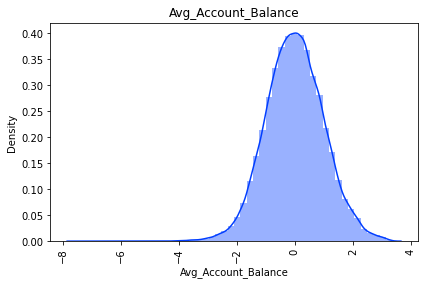

In [141]:
plt.title('Avg_Account_Balance')
sns.distplot(test_df['Avg_Account_Balance'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

## DATA PREPARATION BEFORE MODELLING

The following steps will be done as part of data preparation.

- Converting binary variable (Yes/No) "A free copy of Mastering The Interview" to 1/0
- Create dummies for categorical columns
- Perform train-test split
- Perform Scaling

### **Converting Binary Variables**

In [142]:
#Any kind of Data Preparation while performing Model Building involves converting Yes/No columns to binary values.
varlist =['Credit_Product','Is_Active']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

test_df[varlist] = test_df[varlist].apply(binary_map)

In [143]:
varlist =['Gender']
def binary_map(x):
  return x.map({'Male' : 1, "Female": 0})

test_df[varlist] = test_df[varlist].apply(binary_map)

In [144]:
#Inspecting the data for the same. 
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,Other,X1,25,1,-0.319632,0
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,0.041331,0
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,-2.531914,0
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,-0.062583,0
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,-0.523608,0


### **Create Dummies for Categorical columns**

In [145]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(test_df[['Region_Code','Occupation','Channel_Code']], drop_first=True)

# Adding the results to the master dataframe
test_df = pd.concat([test_df, dummy1], axis=1)

In [146]:
#Checking if the dummy-variables are added into the dataframe correctly.
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,VBENBARO,1,29,RG254,Other,X1,25,1,-0.319632,0,...,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,0.041331,0,...,0,0,0,0,0,0,0,1,0,0
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,-2.531914,0,...,0,0,0,0,0,1,0,0,0,0
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,-0.062583,0,...,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,-0.523608,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
#Dropping the original columns
test_df.drop(['Region_Code','Occupation','Channel_Code'],axis=1,inplace=True)

In [148]:
#Checking if the dummy-variables are added into the dataframe correctly.
test_df.head()

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,VBENBARO,1,29,25,1,-0.319632,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,1,43,49,0,0.041331,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,VK3KGA9M,1,31,14,0,-2.531914,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,TT8RPZVC,1,29,33,0,-0.062583,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,0,29,19,0,-0.523608,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Checking the datatypes of all columns**

In [149]:
#Datatypes
test_df.dtypes

ID                           object
Gender                        int64
Age                           int64
Vintage                       int64
Credit_Product                int64
Avg_Account_Balance         float64
Is_Active                     int64
Region_Code_RG251             uint8
Region_Code_RG252             uint8
Region_Code_RG254             uint8
Region_Code_RG257             uint8
Region_Code_RG261             uint8
Region_Code_RG263             uint8
Region_Code_RG268             uint8
Region_Code_RG269             uint8
Region_Code_RG270             uint8
Region_Code_RG272             uint8
Region_Code_RG273             uint8
Region_Code_RG274             uint8
Region_Code_RG277             uint8
Region_Code_RG279             uint8
Region_Code_RG280             uint8
Region_Code_RG281             uint8
Region_Code_RG282             uint8
Region_Code_RG283             uint8
Region_Code_RG284             uint8
Occupation_Salaried           uint8
Occupation_Self_Employed    

**We can see that mostly all columns are already converted into Integer/Numerical datatype, and hence we can continue with our evaluation**

In [150]:
#Adding all feature columns to X Variable
X_test = test_df.drop(['ID'], axis=1)

In [151]:
X_test.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,25,1,-0.319632,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,43,49,0,0.041331,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,31,14,0,-2.531914,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,29,33,0,-0.062583,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,29,19,0,-0.523608,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
scaler = StandardScaler()

X_test[['Age','Vintage','Avg_Account_Balance']] = scaler.fit_transform(X_test[['Age','Vintage','Avg_Account_Balance']])

X_test.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,-0.999878,-0.676804,1,-0.319632,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.058563,0.066841,0,0.041331,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,-0.865404,-1.017641,0,-2.531914,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,-0.999878,-0.428922,0,-0.062583,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.999878,-0.862715,0,-0.523608,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#Checking the mean and standard deviation
X_test.describe()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG257,...,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
count,105312.000000,1.053120e+05,1.053120e+05,105312.000000,1.053120e+05,105312.000000,105312.000000,105312.000000,105312.00000,105312.000000,...,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000
mean,0.547943,-1.719142e-16,-1.464105e-17,0.296092,-9.985598e-18,0.394210,0.025429,0.017197,0.11145,0.024575,...,0.052501,0.020359,0.022191,0.122313,0.077607,0.293537,0.420351,0.277043,0.277927,0.022628
std,0.497698,1.000005e+00,1.000005e+00,0.456534,1.000005e+00,0.488683,0.157426,0.130004,0.31469,0.154825,...,0.223036,0.141224,0.147306,0.327648,0.267554,0.455385,0.493618,0.447540,0.447979,0.148715
min,0.000000,-1.336062e+00,-1.234537e+00,0.000000,-7.555383e+00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.326411e-01,-8.317299e-01,0.000000,-6.662719e-01,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-5.856336e-02,-4.599076e-01,0.000000,-9.996723e-03,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.810408e-01,8.104853e-01,1.000000,6.613735e-01,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,2.765380e+00,2.731567e+00,1.000000,3.362093e+00,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Standard Deviation is set to 1 and hence it is scaled correctly.**

### **Building the model - on test set**

In [154]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

cols=X_train.columns[rfe.support_]

print(cols)

X_test = X_test[cols]
X_test.head()

Index(['Age', 'Vintage', 'Credit_Product', 'Region_Code_RG254',
       'Region_Code_RG268', 'Region_Code_RG273', 'Region_Code_RG277',
       'Region_Code_RG279', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X2',
       'Channel_Code_X3', 'Channel_Code_X4'],
      dtype='object')


,Age,Vintage,Credit_Product,Region_Code_RG254,Region_Code_RG268,Region_Code_RG273,Region_Code_RG277,Region_Code_RG279,Region_Code_RG283,Region_Code_RG284,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,-0.999878,-0.676804,1,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.058563,0.066841,0,0,1,0,0,0,0,0,0,0,1,0,0
2,-0.865404,-1.017641,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.999878,-0.428922,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.999878,-0.862715,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [156]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [157]:
#Displaying all the predicted values
y_test_pred[:10]

0    0.052109
1    0.257649
2    0.095865
3    0.046018
4    0.039712
5    0.444782
6    0.320954
7    0.114684
8    0.541756
9    0.352981
dtype: float64

### **Creating a dataframe with the predicted values**

In [158]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
0,0.052109
1,0.257649
2,0.095865
3,0.046018
4,0.039712


In [159]:
y_test_pred_1.head()

,0
0,0.052109
1,0.257649
2,0.095865
3,0.046018
4,0.039712


In [160]:
# Converting y_test to dataframe
y_test=test_df['ID']
y_test.head()

0    VBENBARO
1    CCMEWNKY
2    VK3KGA9M
3    TT8RPZVC
4    SHQZEYTZ
Name: ID, dtype: object

In [161]:
# Putting CustID to index
y_test['ID'] = y_test.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_test_pred_1],axis=1)

In [164]:
y_pred_final.head()

,ID,0
0,VBENBARO,0.052109
1,CCMEWNKY,0.257649
2,VK3KGA9M,0.095865
3,TT8RPZVC,0.046018
4,SHQZEYTZ,0.039712


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [166]:
#Predicting the test model on cut off probabilty
y_pred_final['Is_Lead'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.275 else 0)

In [167]:
#Displaying the predicted value dataframe.
y_pred_final.head()

,ID,Conversion_Prob,Is_Lead
0,VBENBARO,0.052109,0
1,CCMEWNKY,0.257649,0
2,VK3KGA9M,0.095865,0
3,TT8RPZVC,0.046018,0
4,SHQZEYTZ,0.039712,0


In [168]:
y_pred_final['Is_Lead'].value_counts(normalize=True)

0    0.588246
1    0.411754
Name: Is_Lead, dtype: float64

In [169]:
y_ans=y_pred_final.copy()

In [170]:
y_ans=y_ans.drop('Conversion_Prob',axis=1)

In [171]:
#Displaying the predicted value dataframe.
y_ans.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [172]:
y_ans['Is_Lead'].value_counts(normalize=True)

0    0.588246
1    0.411754
Name: Is_Lead, dtype: float64

In [173]:
y_ans.reset_index(drop=True, inplace=True)
y_ans.to_csv('solution.csv',index=False)

### From our model, we can conclude following points :

Below are the variables used in model to predict the lead

- Channel_Code_X3,Channel_Code_X2,Channel_Code_X4
- Age,Vintage,Credit_Product
- Occupation_Self_Employed,Occupation_Salaried, 
- Region_Code_RG283,Region_Code_RG254,Region_Code_RG284,Region_Code_RG277,Region_Code_RG273,Region_Code_RG252, Region_Code_RG279

From EDA and model variables, it can be concluded that the bank should focus on more on

- Channel_Code_X3 ,Channel_Code_X2,Channel_Code_X4 because the propotion between lead and non lead is less compared to Channel_Code_X1.
- Age feature also play important role.The median of age of potential leads are around 50 years whereas 40 years for non potential leads. So bank should focus on actions that attract non potential age leads also.
-  In vintage, the converted leads are in higher proption in Q1 to median range that is roughly 25 to 70 months vintage period whereas in non leads, the high proption of people are in 30 to 60 months vintage.
- The propotion between lead and not lead is less for customer with active credit product eventhough the leads are higher if they don't have active credit product.
- Occupation with Salaried category have high propotion between lead and non lead and self_employed have less comapartively and from above graphs we can see that, the self_employed category have higher leads.
- Region_Code_RG283,Region_Code_RG254,Region_Code_RG284,Region_Code_RG268 have high leads eventhough propotion to leads and non leads have high
- Region_Code_RG252 have least leads and remainig region model variables have low propotion between leads and non leads eventhough leads are less. 


**Age around 50 years,self employed with Channel code X3,X4,X2 with vintage period around 2 to 6 years with inactive credit product(no) are potential leads**

**The bank should come up with new schemes to convert people into leads with age around 40 years, salaried category with vintage peiod 2.5 to 5 years with active credit product.**

**People in all the region codes need to be focused. Either propotion of leads to non leads is high and lead are also high
or propotion of leads to non leads is low and lead are also low**


---------------------------------------------------------------------------------------------------------------------------